<a href="https://colab.research.google.com/github/devflash101/POC/blob/deep-learning/Deep%20Learning/chapter04_classification-and-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying movie reviews: A binary classification example

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000
)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(len(train_data[0]))
print(train_labels[0])

218
1


In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
# word_index is a dictionary mapping words to an integer index.
word_index = imdb.get_word_index()
# Reverses it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Decodes the review. Note that the indices are offset by 3 because 0,
# 1, and 2 are reserved indices for "padding," "start of sequence," and
# "unknown."
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

In [ ]:
decoded_review[:500]

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to ever"

## Preparing the data


In [ ]:
import numpy as np

def multi_hot_encode(sequences, num_classes):
    # Creates an all-zero matrix of shape (len(sequences), num_classes)
    results = np.zeros((len(sequences), num_classes))
    for i, sequence in enumerate(sequences):
        # Sets specific indices of results[i] to 1s
        results[i][sequence] = 1.0
    return results

# Vectorized training data
x_train = multi_hot_encode(train_data, num_classes=10000)
# Vectorized test data
x_test = multi_hot_encode(test_data, num_classes=10000)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = train_labels.astype("float32")
y_test = test_labels.astype("float32")

## Building model


In [ ]:
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.6720 - loss: 0.6394 - val_accuracy: 0.8555 - val_loss: 0.4247
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8857 - loss: 0.3537 - val_accuracy: 0.8826 - val_loss: 0.3098
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9295 - loss: 0.2281 - val_accuracy: 0.8895 - val_loss: 0.2801
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9489 - loss: 0.1668 - val_accuracy: 0.8888 - val_loss: 0.2785
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9634 - loss: 0.1272 - val_accuracy: 0.8875 - val_loss: 0.2885
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9757 - loss: 0.0973 - val_accuracy: 0.8839 - val_loss: 0.3070
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9821 - loss: 0.0761 - val_accuracy: 0.8827 - val_loss: 0.3303
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9896 - loss: 0.0554 - val_accuracy: 0.8797 - v

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.2,
)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6983 - loss: 0.6089 - val_accuracy: 0.8676 - val_loss: 0.3742
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9004 - loss: 0.3025 - val_accuracy: 0.8914 - val_loss: 0.2871
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9330 - loss: 0.2036 - val_accuracy: 0.8934 - val_loss: 0.2730
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9509 - loss: 0.1566 - val_accuracy: 0.8890 - val_loss: 0.2808
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9609 - loss: 0.1259 - val_accuracy: 0.8850 - val_loss: 0.3173
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9667 - loss: 0.1032 - val_accuracy: 0.8804 - val_loss: 0.3495
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9731 - loss: 0.0894 - val_accuracy: 0.8808 - val_loss: 0.3599
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9842 - loss: 0.0654 - val_accuracy: 0.8802 - v

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

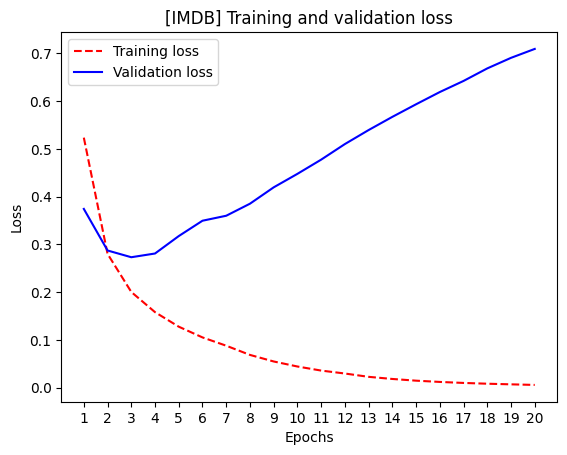

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
# "r--" is for "dashed red line."
plt.plot(epochs, loss_values, "r--", label="Training loss")
# "b" is for "solid blue line."
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("[IMDB] Training and validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

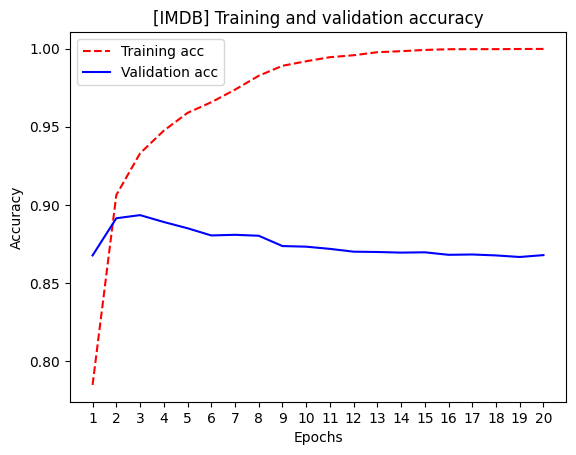

In [ ]:
# Clears the figure
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "r--", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("[IMDB] Training and validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7186 - loss: 0.5891
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9113 - loss: 0.2684
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9380 - loss: 0.1879
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9532 - loss: 0.1476
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8762 - loss: 0.3138


In [ ]:
results

[0.3126310408115387, 0.8776400089263916]

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.15085936],
       [0.9999816 ],
       [0.7023862 ],
       ...,
       [0.07656944],
       [0.05310884],
       [0.4128989 ]], dtype=float32)

# Classifying newswires: A multiclass classification example

## The Reuters dataset


In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000
)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [2]:
print(len(train_data))
print(len(test_data))

8982
2246


In [3]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    # The indices are offset by 3 because 0, 1, and 2 are reserved
    # indices for "padding," "start of sequence," and "unknown."
    [reverse_word_index.get(i - 3, "?") for i in train_data[10]]
)

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [6]:
decoded_newswire[:100]

'? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs '

In [7]:
train_labels[10]

np.int64(3)

## Preparing the data


In [9]:
import numpy as np

def multi_hot_encode(sequences, num_classes):
    # Creates an all-zero matrix of shape (len(sequences), num_classes)
    results = np.zeros((len(sequences), num_classes))
    for i, sequence in enumerate(sequences):
        # Sets specific indices of results[i] to 1s
        results[i][sequence] = 1.0
    return results

# Vectorized training data
x_train = multi_hot_encode(train_data, num_classes=10000)
# Vectorized test data
x_test = multi_hot_encode(test_data, num_classes=10000)

In [10]:
def one_hot_encode(labels, num_classes=46):
    results = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        results[i, label] = 1.0
    return results

# Vectorized training labels
y_train = one_hot_encode(train_labels)
# Vectorized test labels
y_test = one_hot_encode(test_labels)

In [11]:
from keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## Building model


In [13]:
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="softmax"),
    ]
)

In [14]:
top_3_accuracy = keras.metrics.TopKCategoricalAccuracy(
    k=3, name="top_3_accuracy"
)
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy", top_3_accuracy],
)

In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [16]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.1982 - loss: 3.6226 - top_3_accuracy: 0.3124 - val_accuracy: 0.5240 - val_loss: 2.8169 - val_top_3_accuracy: 0.6230
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5520 - loss: 2.5014 - top_3_accuracy: 0.6847 - val_accuracy: 0.6300 - val_loss: 1.8796 - val_top_3_accuracy: 0.7520
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6820 - loss: 1.6189 - top_3_accuracy: 0.7770 - val_accuracy: 0.7000 - val_loss: 1.3894 - val_top_3_accuracy: 0.7930
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7544 - loss: 1.1453 - top_3_accuracy: 0.8526 - val_accuracy: 0.7420 - val_loss: 1.1836 - val_top_3_accuracy: 0.8450
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8121 - loss: 0.9022 - top_3_accuracy: 0.8898 - val_accuracy: 0.7760 - val_loss: 1.0687 - val_top_3_accuracy: 0.8680
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8573 - loss: 0.6867 - top_3_a

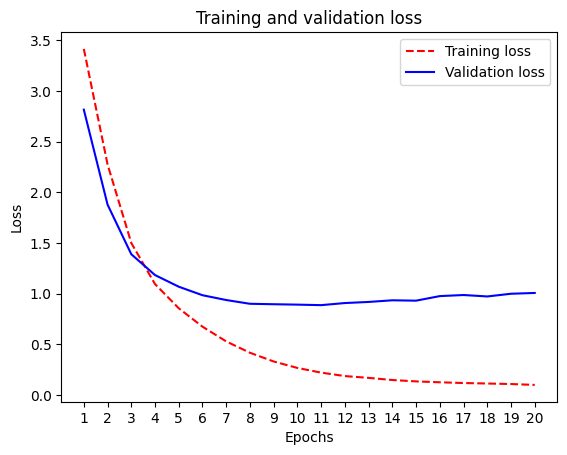

In [18]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "r--", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

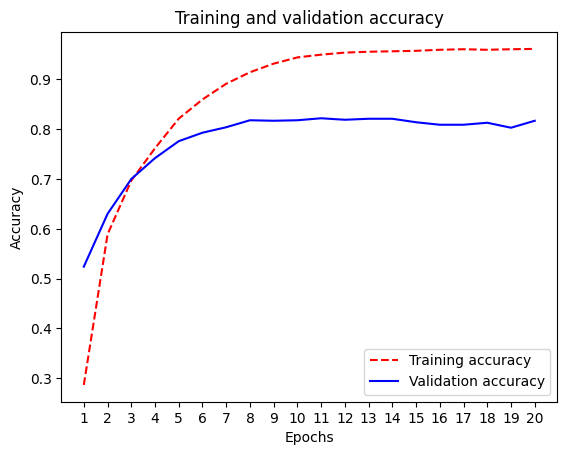

In [19]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "r--", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

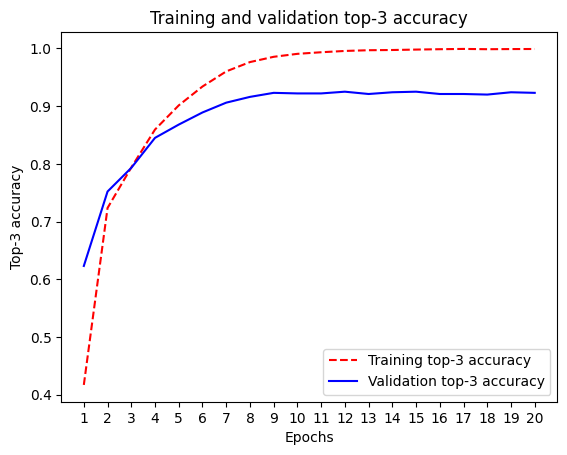

In [20]:
plt.clf()
acc = history.history["top_3_accuracy"]
val_acc = history.history["val_top_3_accuracy"]
plt.plot(epochs, acc, "r--", label="Training top-3 accuracy")
plt.plot(epochs, val_acc, "b", label="Validation top-3 accuracy")
plt.title("Training and validation top-3 accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Top-3 accuracy")
plt.legend()
plt.show()

In [21]:
model = keras.Sequential(
    [
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="softmax"),
    ]
)
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    x_train,
    y_train,
    epochs=9,
    batch_size=512,
)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.3344 - loss: 3.5610
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.6082 - loss: 2.0148
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7178 - loss: 1.2888
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.7967 - loss: 0.9588
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8467 - loss: 0.7224
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.8884 - loss: 0.5508
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9060 - loss: 0.4462
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9211 - loss: 0.3539
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9408 - loss: 0.2673
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8035 - loss: 0.9255


In [22]:
results

[0.9416303038597107, 0.7934104800224304]

In [23]:
predictions = model.predict(x_test)


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [24]:
predictions[0].shape

(46,)

In [25]:
np.sum(predictions[0])

np.float32(1.0000001)

In [28]:
np.argmax(predictions[0])

np.int64(3)

## A different way to handle the labels and the loss


In [29]:
y_train = train_labels
y_test = test_labels

In [30]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

##The importance of having sufficiently large intermediate layers


In [32]:
model = keras.Sequential(
    [
        layers.Dense(64, activation="relu"),
        layers.Dense(4, activation="relu"),
        layers.Dense(46, activation="softmax"),
    ]
)
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val),
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.0735 - loss: 3.6594 - val_accuracy: 0.2780 - val_loss: 2.7720
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3717 - loss: 2.3697 - val_accuracy: 0.6130 - val_loss: 1.5762
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6313 - loss: 1.4142 - val_accuracy: 0.6490 - val_loss: 1.4053
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6914 - loss: 1.1619 - val_accuracy: 0.6710 - val_loss: 1.3320
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7437 - loss: 0.9626 - val_accuracy: 0.6940 - val_loss: 1.2849
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7721 - loss: 0.8681 - val_accuracy: 0.6970 - val_loss: 1.2812
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7999 - loss: 0.7686 - val_accuracy: 0.7080 - val_loss: 1.2826
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8111 - loss: 0.7325 - val_accuracy: 0.7110 - v

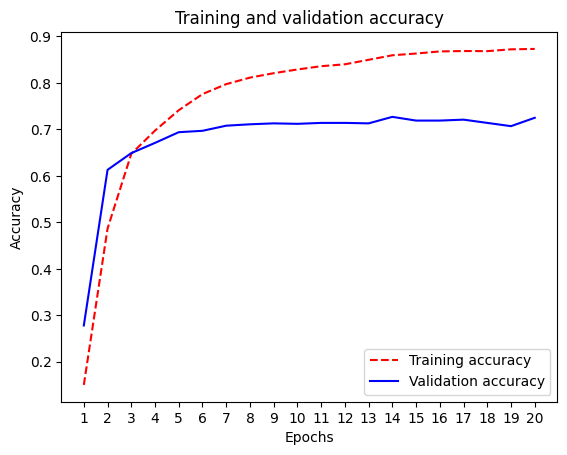

In [33]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "r--", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()